### Run this first

In [616]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,PolynomialFeatures,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score,cross_val_predict,cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import opendatasets as od

import json
import os

%matplotlib inline

In [21]:
with open('../kaggle.json') as f:
    kaggle = json.load(f)
kaggle['key']

'c56c35066fe770cf19d85bc8526d26eb'

### Downloading and importing dataset

In [22]:
#od.download('https://www.kaggle.com/c/house-prices-advanced-regression-techniques')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  mallapraveen


Your Kaggle Key:

  ································


100%|██████████| 199k/199k [00:00<00:00, 13.1MB/s]


Extracting archive .\house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to .\house-prices-advanced-regression-techniques


In [25]:
os.listdir('house-prices-advanced-regression-techniques')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [29]:
file_name = 'train.csv'

In [30]:
path = 'house-prices-advanced-regression-techniques/' + file_name

In [254]:
housing = pd.read_csv(path)

In [255]:
housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploratory Data Analysis 

In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [331]:
null_cols = ['Alley','FireplaceQu','MiscFeature','PoolQC','Fence']
housing = housing.drop(columns=null_cols)
housing.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [332]:
corr = housing.corr()['SalePrice'].sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:xlabel='SalePrice'>

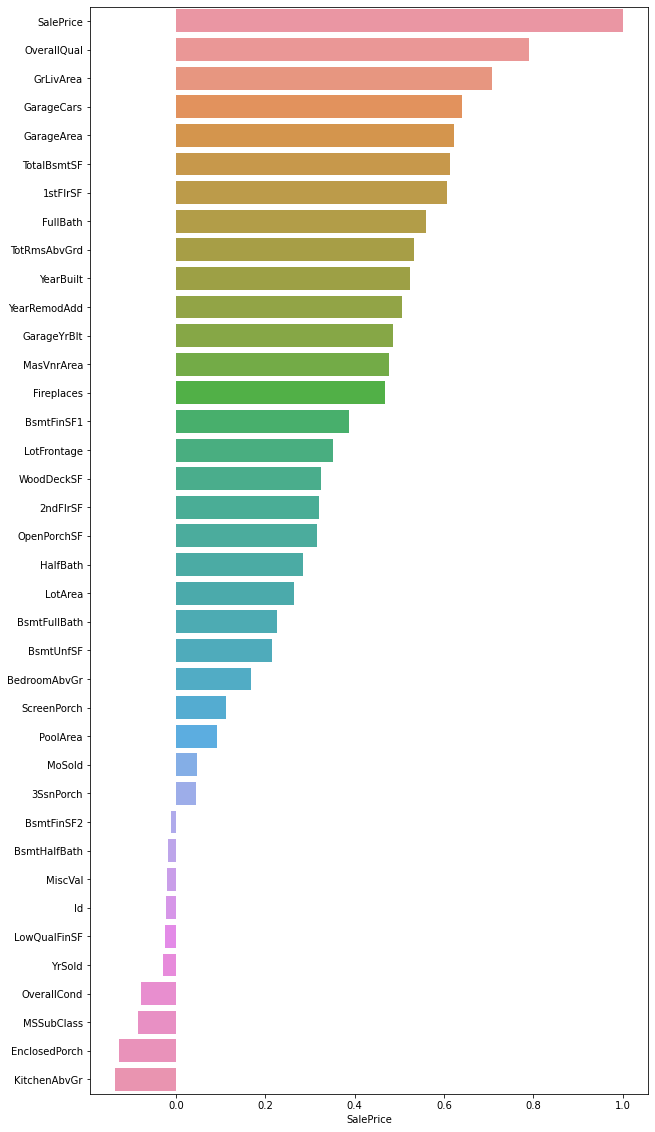

In [333]:
plt.figure(figsize=(10,20))
sns.barplot(x=corr,y=corr.index)

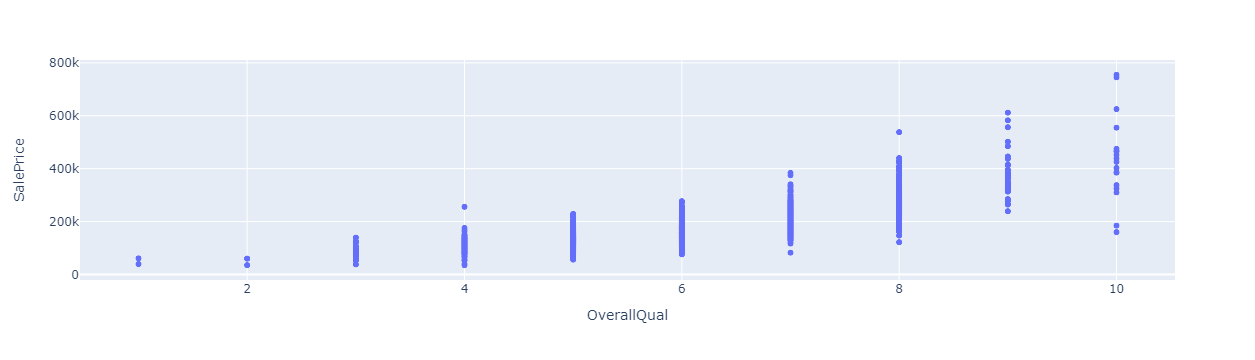

In [334]:
px.scatter(data_frame=housing,x='OverallQual',y='SalePrice')

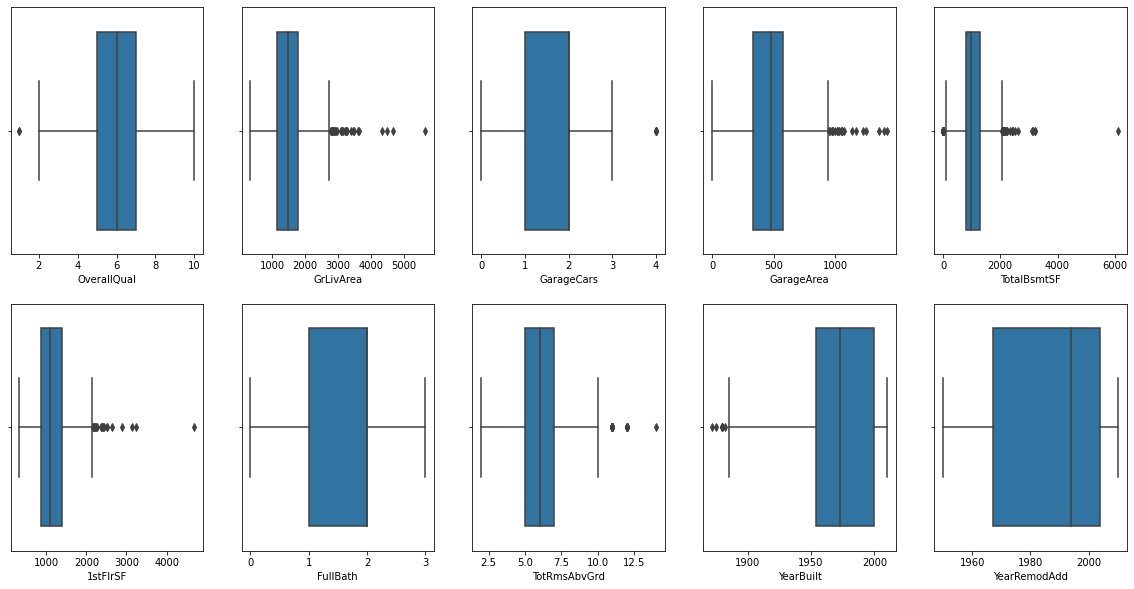

In [349]:
cols = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
fig,axs = plt.subplots(nrows=2,ncols=5,figsize=(20, 10))
axs = axs.flatten()
index = 0
for i in cols:
    sns.boxplot(data=housing,x=i,ax=axs[index])
    index+=1

### Removing Outliers

In [641]:
housing = pd.read_csv(path)
null_cols = ['Alley','FireplaceQu','MiscFeature','PoolQC','Fence']
housing = housing.drop(columns=null_cols)
housing.head(2)
housing = housing[(housing['GrLivArea'] < 2700) & (housing['GarageArea'] < 950) & (housing['TotalBsmtSF'] < 2000) & (housing['1stFlrSF'] < 2200)]

inputs_cols = housing.columns.tolist()
inputs_cols.remove('SalePrice')
inputs_cols.remove('Id')
targets_cols = 'SalePrice'
inputs_df = housing[inputs_cols]
targets_df = housing[targets_cols]

numeric_cols = inputs_df.select_dtypes(include=np.number).columns.tolist()[1:-1]
print(numeric_cols)

print('\n')

categorical_cols = inputs_df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

### Imputing

In [642]:
imputer = SimpleImputer()
imputer.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
inputs_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008,WD,Normal
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007,WD,Normal


### Feature Scaling

* SalePrice follow kind of normal distribution, so we use StandardScaler

In [643]:
scaler = StandardScaler()
scaler.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])
inputs_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,-0.179000,-0.194366,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.274648,-0.366068,-0.119492,-0.268385,-0.046354,-0.085421,-1.598742,2008,WD,Normal
1,20,RL,0.559229,-0.054570,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,-0.709976,-0.366068,-0.119492,-0.268385,-0.046354,-0.085421,-0.490874,2007,WD,Normal
2,60,RL,-0.031354,0.146006,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-0.032038,-0.366068,-0.119492,-0.268385,-0.046354,-0.085421,0.986282,2008,WD,Normal
3,70,RL,-0.425077,-0.060649,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,-0.145028,4.201994,-0.119492,-0.268385,-0.046354,-0.085421,-1.598742,2006,WD,Abnorml
4,60,RL,0.756091,0.511905,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.645900,-0.366068,-0.119492,-0.268385,-0.046354,-0.085421,2.094149,2008,WD,Normal


normalizer = MinMaxScaler()
normalizer.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = normalizer.transform(inputs_df[numeric_cols])
inputs_df.head(5)

### Encoding

In [645]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out())
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])
inputs_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,-0.179000,-0.194366,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,RL,0.559229,-0.054570,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,RL,-0.031354,0.146006,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,RL,-0.425077,-0.060649,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,RL,0.756091,0.511905,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Modelling

In [646]:
def rmse(x,y):
    return np.sqrt(np.mean(np.square(x-y)))

#### Linear Regression

In [647]:
#X = inputs_df[numeric_cols+encoded_cols]
X = inputs_df[step_cols]
Y = targets_df
train_inputs,val_inputs,train_targets,val_targets = train_test_split(X,Y,test_size=0.2,random_state=42)
linear = LinearRegression()
linear.fit(train_inputs,train_targets)
train_preds = linear.predict(train_inputs)
print('RMSE on train set :',rmse(train_targets,train_preds))
val_preds = linear.predict(val_inputs)
print('RMSE on validation set :',rmse(val_targets,val_preds))

RMSE on train set : 17535.56295693167
RMSE on validation set : 18082.947673698156


#### Polynomial Regression

In [513]:
#X = inputs_df[numeric_cols+encoded_cols]
X = inputs_df[step_cols]
Y = targets_df
poly = PolynomialFeatures(degree=2).fit(X)
X1 = poly.transform(X)
train_inputs,val_inputs,train_targets,val_targets = train_test_split(X1,Y,random_state=42)
poly_model = LinearRegression().fit(train_inputs,train_targets)
train_preds = poly_model.predict(train_inputs)
print('RMSE on train set :',rmse(train_targets,train_preds))
val_preds = poly_model.predict(val_inputs)
print('RMSE on validation set :',rmse(val_targets,val_preds))

RMSE on train set : 6874.8715813700865
RMSE on validation set : 462184.08108125505


#### Ridge Regression

In [565]:
#X = inputs_df[numeric_cols+encoded_cols]
X = inputs_df[step_cols]
Y = targets_df
train_inputs,val_inputs,train_targets,val_targets = train_test_split(X,Y,test_size=0.2,random_state=42)
ridge = Ridge()
ridge.fit(train_inputs,train_targets)
train_preds = ridge.predict(train_inputs)
print('RMSE on train set :',rmse(train_targets,train_preds))
val_preds = ridge.predict(val_inputs)
print('RMSE on validation set :',rmse(val_targets,val_preds))

RMSE on train set : 17575.643349056056
RMSE on validation set : 18213.546337726544


#### Lasso Regression

In [568]:
#X = inputs_df[numeric_cols+encoded_cols]
X = inputs_df[step_cols]
Y = targets_df
train_inputs,val_inputs,train_targets,val_targets = train_test_split(X,Y,test_size=0.2,random_state=42)
lasso = Lasso()
lasso.fit(train_inputs,train_targets)
train_preds = lasso.predict(train_inputs)
print('RMSE on train set :',rmse(train_targets,train_preds))
val_preds = lasso.predict(val_inputs)
print('RMSE on validation set :',rmse(val_targets,val_preds))

RMSE on train set : 17535.657498607223
RMSE on validation set : 18093.457866994428


#### ElasticNet Regression

In [579]:
#X = inputs_df[numeric_cols+encoded_cols]
X = inputs_df[step_cols]
Y = targets_df
train_inputs,val_inputs,train_targets,val_targets = train_test_split(X,Y,test_size=0.2,random_state=42)
elastic = ElasticNet()
elastic.fit(train_inputs,train_targets)
train_preds = elastic.predict(train_inputs)
print('RMSE on train set :',rmse(train_targets,train_preds))
val_preds = elastic.predict(val_inputs)
print('RMSE on validation set :',rmse(val_targets,val_preds))

RMSE on train set : 24112.599763913946
RMSE on validation set : 25289.664001675683


In [654]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = inputs_df[numeric_cols+encoded_cols]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

                   feature        VIF
0              LotFrontage   2.394212
1                  LotArea   3.236805
2              OverallQual   5.019239
3              OverallCond   2.630439
4                YearBuilt  15.092635
..                     ...        ...
271  SaleCondition_AdjLand        inf
272   SaleCondition_Alloca        inf
273   SaleCondition_Family        inf
274   SaleCondition_Normal        inf
275  SaleCondition_Partial        inf

[276 rows x 2 columns]


#### Stepwise Regression

In [598]:
import statsmodels.api as sm

X = inputs_df[numeric_cols+encoded_cols]
Y = targets_df

def get_stats():
    results = sm.OLS(Y, X).fit()
    print(results.summary())

get_stats()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     78.68
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:18:17   Log-Likelihood:                -15360.
No. Observations:                1385   AIC:                         3.118e+04
Df Residuals:                    1156   BIC:                         3.238e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage             635.88

In [495]:
import warnings
warnings.filterwarnings('ignore')

In [496]:
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

result = stepwise_selection(X, Y)

print('resulting features:')
print(result)

Add  OverallQual                    with p-value 4.70237e-304
Add  GrLivArea                      with p-value 5.18957e-81
Add  BsmtFinSF1                     with p-value 1.8895e-77
Add  YearBuilt                      with p-value 6.31883e-39
Add  BsmtQual_Ex                    with p-value 1.47578e-34
Add  BldgType_1Fam                  with p-value 4.20046e-27
Add  TotalBsmtSF                    with p-value 1.90912e-20
Add  OverallCond                    with p-value 1.43661e-19
Add  ExterQual_TA                   with p-value 6.28424e-16
Add  LotArea                        with p-value 4.35587e-17
Add  KitchenQual_Ex                 with p-value 4.28704e-15
Add  Neighborhood_Crawfor           with p-value 6.56391e-13
Add  GarageCars                     with p-value 5.40718e-12
Add  BsmtExposure_Gd                with p-value 1.28009e-11
Add  Neighborhood_NridgHt           with p-value 9.37819e-12
Add  SaleType_New                   with p-value 2.19837e-10
Add  Neighborhood_NoRidg

In [498]:
step_cols = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt', 'BsmtQual_Ex', 'BldgType_1Fam', 'TotalBsmtSF', 'OverallCond', 'ExterQual_TA', 'LotArea', 'KitchenQual_Ex', 'Neighborhood_Crawfor', 'GarageCars', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'SaleType_New', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'SaleCondition_Normal', 'Neighborhood_Somerst', 'Functional_Typ', 'Exterior1st_BrkFace', 'WoodDeckSF', 'Condition1_Norm', 'Neighborhood_BrkSide', 'BsmtFinType2_nan', 'BsmtQual_nan', 'BsmtFinType1_nan', 'BsmtCond_nan', 'BsmtFullBath', 'Fireplaces', 'YearRemodAdd', 'Neighborhood_Mitchel', 'LotConfig_CulDSac', 'LandSlope_Sev', 'HouseStyle_2.5Fin', 'BsmtFinType1_GLQ', 'Condition1_RRAe', 'Functional_Sev', 'PoolArea', 'ExterQual_Ex', 'BedroomAbvGr', 'MSZoning_C (all)', 'RoofMatl_Membran', 'Heating_OthW', 'GarageType_nan', 'GarageArea', 'GarageCond_nan', 'GarageFinish_nan', 'GarageQual_nan', 'HeatingQC_Ex', 'ScreenPorch']

### RFE

#### Linear

In [584]:
X = inputs_df[numeric_cols+encoded_cols]
Y = targets_df
linear = LinearRegression()
selector = RFE(linear,step=1)
selector = selector.fit(X, Y)
X = selector.transform(X)
train_inputs,val_inputs,train_targets,val_targets = train_test_split(X,Y,test_size=0.2,random_state=42)
linear.fit(train_inputs,train_targets)
train_preds = linear.predict(train_inputs)
print('RMSE on train set :',rmse(train_targets,train_preds))
val_preds = linear.predict(val_inputs)
print('RMSE on validation set :',rmse(val_targets,val_preds))

276
138
RMSE on train set : 29901.362511425985
RMSE on validation set : 9632922974312030.0


#### Ridge

In [559]:
X = inputs_df[numeric_cols+encoded_cols]
Y = targets_df
ridge = Ridge()
selector = RFE(ridge,step=1)
selector = selector.fit(X, Y)
X = selector.transform(X)
train_inputs,val_inputs,train_targets,val_targets = train_test_split(X,Y,test_size=0.2,random_state=42)
ridge.fit(train_inputs,train_targets)
train_preds = ridge.predict(train_inputs)
print('RMSE on train set :',rmse(train_targets,train_preds))
val_preds = ridge.predict(val_inputs)
print('RMSE on validation set :',rmse(val_targets,val_preds))

RMSE on train set : 16780.3226096967
RMSE on validation set : 19250.321200591403


#### Lasso

In [560]:
X = inputs_df[numeric_cols+encoded_cols]
Y = targets_df
lasso = Lasso()
selector = RFE(lasso,step=1)
selector = selector.fit(X, Y)
X = selector.transform(X)
train_inputs,val_inputs,train_targets,val_targets = train_test_split(X,Y,test_size=0.2,random_state=42)
lasso.fit(train_inputs,train_targets)
train_preds = lasso.predict(train_inputs)
print('RMSE on train set :',rmse(train_targets,train_preds))
val_preds = lasso.predict(val_inputs)
print('RMSE on validation set :',rmse(val_targets,val_preds))
cross_val_score()

RMSE on train set : 16577.980114870206
RMSE on validation set : 19508.000489049926


#### ElasticNet

In [581]:
X = inputs_df[numeric_cols+encoded_cols]
Y = targets_df
elastic = ElasticNet()
selector = RFE(lasso,step=1)
selector = selector.fit(X, Y)
X = selector.transform(X)
train_inputs,val_inputs,train_targets,val_targets = train_test_split(X,Y,test_size=0.2,random_state=42)
elastic.fit(train_inputs,train_targets)
train_preds = elastic.predict(train_inputs)
print('RMSE on train set :',rmse(train_targets,train_preds))
val_preds = elastic.predict(val_inputs)
print('RMSE on validation set :',rmse(val_targets,val_preds))

RMSE on train set : 25087.30867207741
RMSE on validation set : 24809.777758581935


### Kaggle Submission

In [519]:
submit = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
submit[numeric_cols] = imputer.transform(submit[numeric_cols])
submit[numeric_cols] = scaler.transform(submit[numeric_cols])
submit[encoded_cols] = encoder.transform(submit[categorical_cols])
test_preds = lasso.predict(submit[step_cols])

In [520]:
submission = pd.DataFrame({'Id':submit['Id'],'SalePrice':test_preds})
submission.to_csv('submission.csv',index=False)